# **The Green Metrics Challenge**

Hello everyone!

The purpose of this challenge is to help in solving the​ problem of food waste, through deriving insights that​ touches upon food consumption & sustainability practices.

Below are two sections each analysing a different data set. Go through each section and derive your insights. <br />
*   Food Waste Dataset
*   Restaurant Consumption Dataset
<br /><br />




---
---
#**DATASET: Food Waste**



The **Food Waste UN EDA** dataset provides comprehensive information on food waste across various countries, focusing on **household** (Final consumers in homes), **retail** (Supermarkets, grocery stores, and food distributors), and **food service** (restaurants, cafeterias, and catering) sectors. This dataset enables analysis of food waste patterns in relation to waste sources and regional differences. Below is an overview and detailed description of the dataset.

## **Dataset Overview**

- **Description**: This dataset encompasses estimates of food waste at the household, retail, and food service levels for different countries, along with additional relevant data points.
- **Total Records**: 214 rows and 12 columns.
- **Source**: Kaggle

## **Column Descriptions**

1. **`Country`**: Name of the country.
2. **`combined figures (kg/capita/year)`**: Estimated amount of food waste generated per capita by households, Retail, and Food Services combined annually, measured in kilograms.
3. **`Household estimate (kg/capita/year)`**: Estimated amount of food waste per capita generated by households annually, measured in kilograms.
4. **`Household estimate (tonnes/year)`**: Estimated amount of food waste generated by households annually, measured in tonnes.
5. **`Retail estimate (kg/capita/year)`**: Estimated amount of food waste per capita generated by retail annually, measured in kilograms.
6. **`Retail estimate (tonnes/year)`**: Estimated amount of food waste generated by retial annually, measured in tonnes.
7. **`Food service estimate (kg/capita/year)`**: Estimated amount of food waste per capita generated by food service annually, measured in kilograms.
8. **`Food service estimate (tonnes/year)`**: Estimated amount of food waste generated by Food service annually, measured in tonnes.
9. **`Confidence in estimate`**: Categorization of the confidence level of the estimates assigned per country.
10. **`M49 code`**: United Nations M49 numerical code assigned to each country or area.
11. **`Region`**: Geographical region classification of the country.
12. **`Source`**: URL to the source of the estimates.



---


## Import and Read the Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import numpy as np
import pandas as pd
import re
from collections import Counter

# Assuming kagglehub is installed, if not, uncomment the following line
# !pip install kagglehub
import kagglehub

In [ ]:
# **Food Waste Dataset**


# Download latest version
path = kagglehub.dataset_download("joebeachcapital/food-waste")

print("Path to dataset files:", path)
extract_dir = path


# Iterate through the extracted files and read the first file found.
for root, dirs, files in os.walk(path):
    for file in files:
        file_path = os.path.join(root, file)
        # print(f"Attempting to read: {file_path}")
        try:
            # Attempt to read the file as a CSV
            df = pd.read_csv(file_path)
            print("Successfully read the file as a CSV.")

            # Data overview
            print(df.info())

        except pd.errors.ParserError:
            print(f"Could not parse {file_path} as a CSV. Trying next file...")
        except Exception as e:
            print(f"An error occurred while reading {file_path}: {e}")

df_foodwaste = df

100%|██████████| 6.99k/6.99k [00:00<00:00, 12.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/joebeachcapital/food-waste/versions/1
Successfully read the file as a CSV.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    obje

## EDA - Explatotary Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [ ]:
df['Region'].unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Sub-Saharan Africa', 'Latin America and the Caribbean',
       'Western Asia', 'Australia and New Zealand', 'Western Europe',
       'Eastern Europe', 'Northern America', 'South-eastern Asia',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Polynesia',
       'Micronesia', 'Central Asia'], dtype=object)

In [ ]:
df.sample(5)

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
16,Belarus,112,68,646356,16,147838,28,261341,Very Low Confidence,112,Eastern Europe,https://www.unep.org/resources/report/unep-foo...
85,Haiti,127,83,936940,16,176157,28,311403,Very Low Confidence,332,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
35,Cayman Islands,113,74,4797,13,831,26,1660,Low Confidence,136,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
203,United Rep. of Tanzania,163,119,6907649,16,907219,28,1603740,Very Low Confidence,834,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...


In [ ]:
df[['combined figures (kg/capita/year)',
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)']].describe().apply(lambda x: ['{:.2f}'.format(i) for i in x])

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Retail estimate (kg/capita/year),Food service estimate (kg/capita/year)
count,214.00,214.00,214.00,214.00
mean,126.79,84.29,15.12,27.38
std,22.16,18.31,5.77,6.51
min,61.00,33.00,3.00,3.00
25%,115.00,74.00,13.00,26.00
50%,123.00,80.00,16.00,28.00
75%,137.75,95.00,16.00,28.00
max,260.00,189.00,79.00,90.00


##**Food Waste Per Capita (Per Person)**

###What is the ovreall Food Waste per capita distribution of all countries?

An average person consumes 1.5 to 2.5 kg of food per day, totaling approximately 500 to 900 kg per year

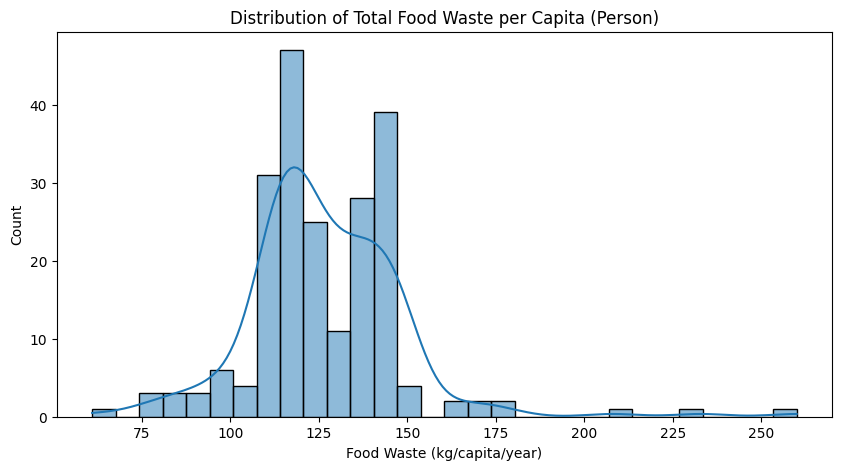

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["combined figures (kg/capita/year)"], bins=30, kde=True) # Changed column name to 'combined figures (kg/capita/year)'
plt.title("Distribution of Total Food Waste per Capita (Person)")
plt.xlabel("Food Waste (kg/capita/year)")
plt.ylabel("Count")
plt.show()


###Which countries have the highest food waste per capita (person)?

<ipython-input-11-adb21869090e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="combined figures (kg/capita/year)", y="Country", palette="Reds_r")


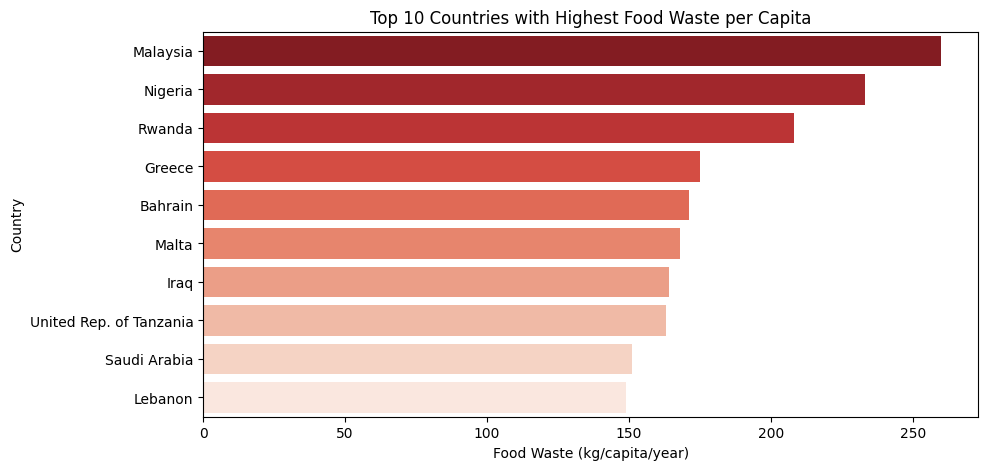

In [ ]:
# Get the top 10 countries
top_countries = df.nlargest(11, "combined figures (kg/capita/year)")

top_countries = top_countries.drop(top_countries.index[3])

if len(top_countries) < 10:
    next_country = df[~df["Country"].isin(top_countries["Country"])].nlargest(1, "combined figures (kg/capita/year)")
    top_countries = pd.concat([top_countries, next_country])

# Plot the updated data
plt.figure(figsize=(10, 5))
sns.barplot(data=top_countries, x="combined figures (kg/capita/year)", y="Country", palette="Reds_r")
plt.title("Top 10 Countries with Highest Food Waste per Capita")
plt.xlabel("Food Waste (kg/capita/year)")
plt.ylabel("Country")
plt.show()


###What is the distribution of food waste among the different sectors?

Taking into consideration that the **Household Sector** are the final consumers in homes, **Retail Sector** are the supermarkets, grocery stores, and food distributors, and the **Food Service Sector** are the restaurants, cafeterias, catering, and institutional food services.

<ipython-input-12-e9a8f4aed582>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="Sector", y="Waste (kg/capita)", palette="Set2")


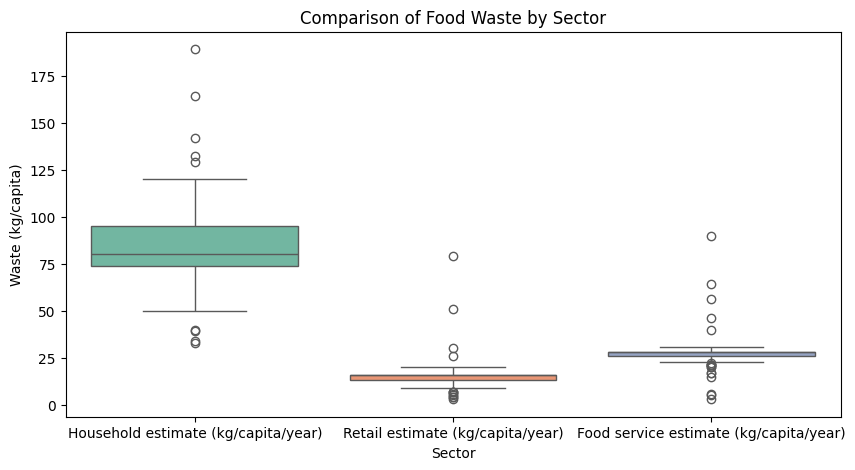

In [ ]:
plt.figure(figsize=(10, 5))

df_melted = df.melt(id_vars=["Country"],
                    value_vars=['Household estimate (kg/capita/year)',
                                'Retail estimate (kg/capita/year)',
                                'Food service estimate (kg/capita/year)'], ##Put it household (houses), retail (expiry date), food service (dunkin dountus)
                    var_name="Sector", value_name="Waste (kg/capita)")

sns.boxplot(data=df_melted, x="Sector", y="Waste (kg/capita)", palette="Set2")
plt.title("Comparison of Food Waste by Sector")
# plt.xticks(rotation=15)
plt.show()

## **Saudi Arabia Specific Analysis**


### Extract Data for Saudi Arabia

In [ ]:
# Filter data for Saudi Arabia
saudi_df = df[df["Country"] == "Saudi Arabia"]

# Display Saudi Arabia's food waste data
saudi_df

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
167,Saudi Arabia,151,105,3594080,20,673502,26,876260,High Confidence,682,Western Asia,https://www.unep.org/resources/report/unep-foo...


### Compare Saudi Arabia’s Food Waste with Global Averages

Global average food waste refers to the mean amount of food discarded per person or across the world in a given year

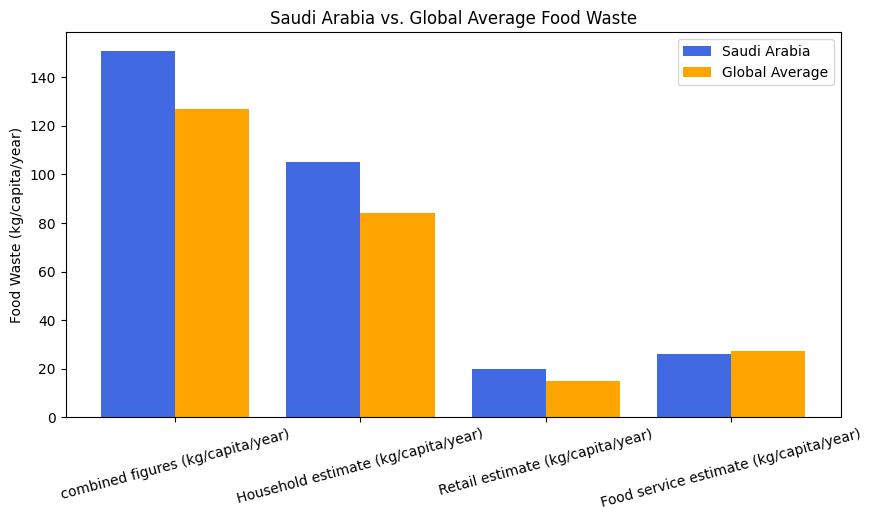

In [ ]:
# Compute global averages
global_avg = df[["combined figures (kg/capita/year)",
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)']].mean()

# Extract Saudi Arabia’s values
saudi_values = saudi_df[["combined figures (kg/capita/year)",
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)']].values.flatten()

# Create a comparison DataFrame
comparison_df = pd.DataFrame({"Category": global_avg.index,
                              "Saudi Arabia": saudi_values,
                              "Global Average": global_avg.values})

# Comparison table
comparison_df

# Plot comparison of Saudi Arabia vs. Global Average
plt.figure(figsize=(10, 5))
bar_width = 0.4
indices = np.arange(len(comparison_df))

plt.bar(indices, comparison_df["Saudi Arabia"], width=bar_width, label="Saudi Arabia", color="royalblue")
plt.bar(indices + bar_width, comparison_df["Global Average"], width=bar_width, label="Global Average", color="orange")

plt.xticks(indices + bar_width / 2, comparison_df["Category"], rotation=15)
plt.ylabel("Food Waste (kg/capita/year)")
plt.title("Saudi Arabia vs. Global Average Food Waste")
plt.legend()
plt.show()

You can download the notebook to do further analysis.

---
---
# **DATASET: Restaurant Consumption**

## **Dataset Overview**

*  **`Dascription`**:
The Dataset provides detailed insights into dining patterns and item-level sales data, collected between January 1, 2019, at 11:30 AM to June 30, 2019, at 8:30 PM, covering a period of nearly six months.

*  **`Total Records`**: 9 columns and 18,100 rows.

*  **`Usecases`**: Menu planning and performance, Sales trends and pricing strategies, Customer segmentation and preferences, and Analyzing consumption patterns.

*  **`Source`**: Kaggle

## **Column Descriptions**

1. **`Date_time`**: Exact date and time of the order.  
2. **`Shift`**: Service period (e.g., Lunch, Dinner).  
3. **`Day Type`**: Type of day (Weekday, Weekend).  
4. **`Day`**: Calendar day of the month (e.g., Monday, Tuesday).
5. **`GatheringSize`**: Number of people in the dining group.  
6. **`MenuCategory`**: Broad menu category.  
7. **`MenuItem`**: Specific menu item ordered.  
8. **`ItemPrice`**: Price of the menu item.  
9. **`ItemQty`**: Quantity of the item ordered.  
10. **`hour`**: Hour of the order (24-hour format).   

---



## Import and Read the Data

In [ ]:
# **Restaurant Consumption Dataset**
# Download latest version
path = kagglehub.dataset_download("nilaydesmukh/restaurant-food-consumption")

print("Path to dataset files:", path)
extract_dir = path


# Iterate through the extracted files and read the first file found.
for root, dirs, files in os.walk(path):
    for file in files:
        file_path = os.path.join(root, file)
        # print(f"Attempting to read: {file_path}")
        try:
            # Attempt to read the file as a Excel
            df = pd.read_excel(file_path)
            print("Successfully read the file as a Excel.")

            # Data overview
            print(df.info())

        except pd.errors.ParserError:
            print(f"Could not parse {file_path} as a Excel. Trying next file...")
        except Exception as e:
            print(f"An error occurred while reading {file_path}: {e}")

df_restaurant = df

100%|██████████| 369k/369k [00:00<00:00, 55.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nilaydesmukh/restaurant-food-consumption/versions/1


Successfully read the file as a Excel.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18100 entries, 0 to 18099
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date_time     18100 non-null  datetime64[ns]
 1   Shift         18100 non-null  object        
 2   Day Type      18100 non-null  object        
 3   Day           18100 non-null  object        
 4   PartySize     18100 non-null  int64         
 5   MenuCateogry  18100 non-null  object        
 6   MenuItem      18100 non-null  object        
 7   ItemPrice     18100 non-null  float64       
 8   ItemQty       18100 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB
None


## EDA - Explatotary Data Analysis

In [ ]:
df.rename(columns={'PartySize': 'GatheringSize'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18100 entries, 0 to 18099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_time      18100 non-null  datetime64[ns]
 1   Shift          18100 non-null  object        
 2   Day Type       18100 non-null  object        
 3   Day            18100 non-null  object        
 4   GatheringSize  18100 non-null  int64         
 5   MenuCateogry   18100 non-null  object        
 6   MenuItem       18100 non-null  object        
 7   ItemPrice      18100 non-null  float64       
 8   ItemQty        18100 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [ ]:
df.sample(5)

,Date_time,Shift,Day Type,Day,GatheringSize,MenuCateogry,MenuItem,ItemPrice,ItemQty
6504,2019-03-07 11:30:00,Lunch,Weekday,Thursday,4,Breads,Garlic naan,3.5,2
3352,2019-02-03 12:30:00,Lunch,Weekend,Sunday,5,Desserts,Kheer,7.0,1
13886,2019-05-19 19:00:00,Dinner,Weekend,Sunday,5,Breads,Spinach naan,6.0,1
6311,2019-03-05 11:50:00,Lunch,Weekday,Tuesday,2,Chicken specials,Chicken tikka masala,18.0,1
7001,2019-03-12 11:30:00,Lunch,Weekday,Tuesday,4,Starter,Tasty flatbread,11.0,1


## Menu Details (for Reference)

<ipython-input-18-efa102a11a35>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return data.applymap(lambda x: '\n'.join(x[i:i+30] for i in range(0, len(x), 30)) if isinstance(x, str) else x)
<ipython-input-18-efa102a11a35>:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


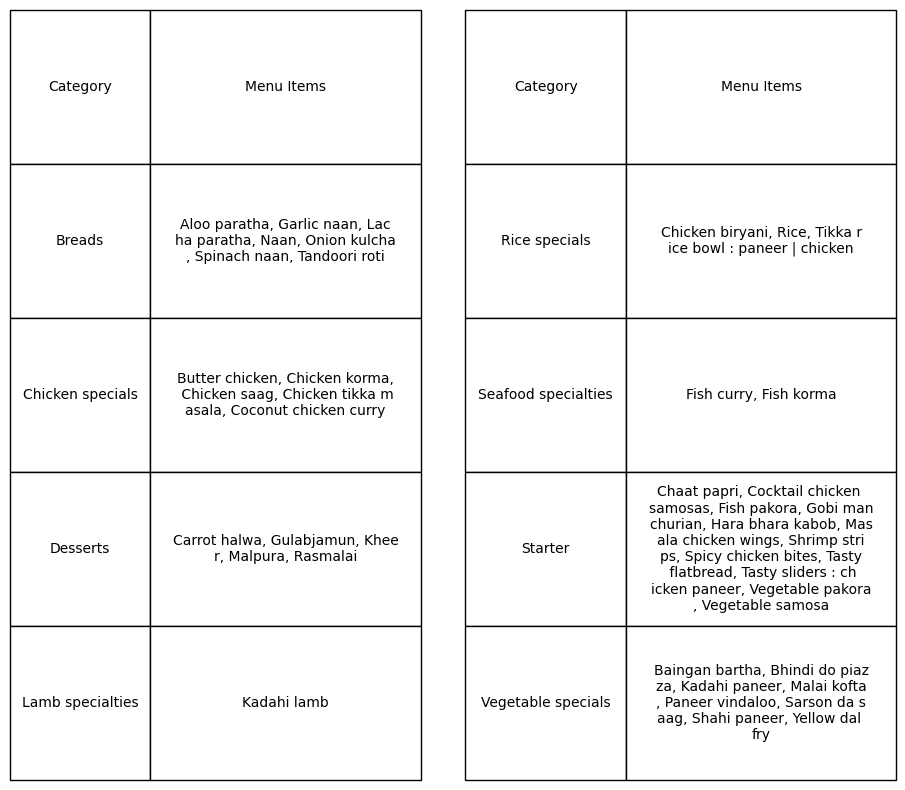

In [ ]:

grouped_data = (
    df.groupby('MenuCateogry')['MenuItem']
    .apply(lambda items: ', '.join(sorted(set(items))))
    .reset_index()
)

grouped_data.columns = ['Category', 'Menu Items']

grouped_data.to_csv("grouped_menu_items.csv", index=False)

mid_index = len(grouped_data) // 2
table_left = grouped_data.iloc[:mid_index]
table_right = grouped_data.iloc[mid_index:]


fig, axes = plt.subplots(1, 2, figsize=(10, 8), gridspec_kw={'wspace': 0.5, 'width_ratios': [1, 1]})

for ax in axes:
    ax.axis('tight')
    ax.axis('off')

def wrap_text(data):
    """Wrap text in the table cells with explicit line breaks."""
    return data.applymap(lambda x: '\n'.join(x[i:i+30] for i in range(0, len(x), 30)) if isinstance(x, str) else x)

table_left_wrapped = wrap_text(table_left)
table_right_wrapped = wrap_text(table_right)

table_left_visual = axes[0].table(
    cellText=table_left_wrapped.values,
    colLabels=table_left_wrapped.columns,
    loc='center',
    cellLoc='center'
)

table_right_visual = axes[1].table(
    cellText=table_right_wrapped.values,
    colLabels=table_right_wrapped.columns,
    loc='center',
    cellLoc='center'
)

for table in [table_left_visual, table_right_visual]:
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(table_left.columns))))

    for key, cell in table.get_celld().items():
        cell.set_height(0.25)
        cell.set_text_props(ha='center', va='center')

plt.tight_layout()
plt.show()


<ipython-input-20-c3522a35da4a>:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


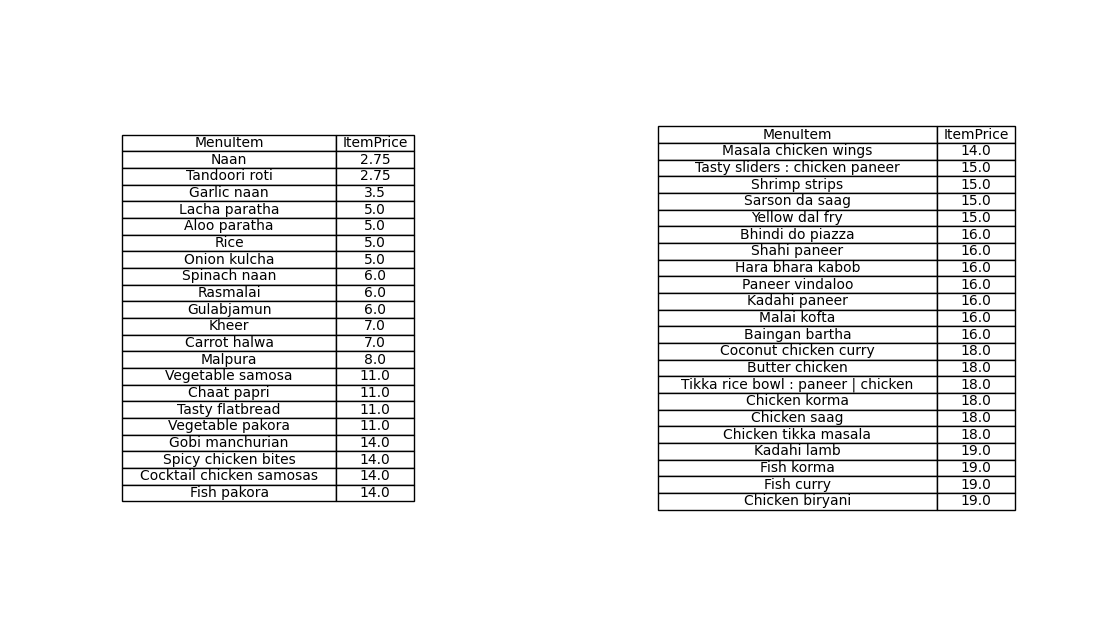

In [ ]:

menu_price_table = df[['MenuItem', 'ItemPrice']].drop_duplicates()


menu_price_table_sorted = menu_price_table.sort_values(by=['ItemPrice'])



mid_index = len(menu_price_table_sorted) // 2
table_left = menu_price_table_sorted.iloc[:mid_index]
table_right = menu_price_table_sorted.iloc[mid_index:]


mid_index = len(menu_price_table_sorted) // 2
table_left = menu_price_table_sorted.iloc[:mid_index]
table_right = menu_price_table_sorted.iloc[mid_index:]

fig, axes = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'wspace': 0.1})

for ax in axes:
    ax.axis('tight')
    ax.axis('off')

table_left_visual = axes[0].table(
    cellText=table_left.values,
    colLabels=table_left.columns,
    loc='center',
    cellLoc='center'
)

table_right_visual = axes[1].table(
    cellText=table_right.values,
    colLabels=table_right.columns,
    loc='center',
    cellLoc='center'
)

for table in [table_left_visual, table_right_visual]:
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(table_left.columns))))

plt.tight_layout()
plt.show()


## Menu Categories & Price Distribution

<ipython-input-21-799a434c47df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette="flare")


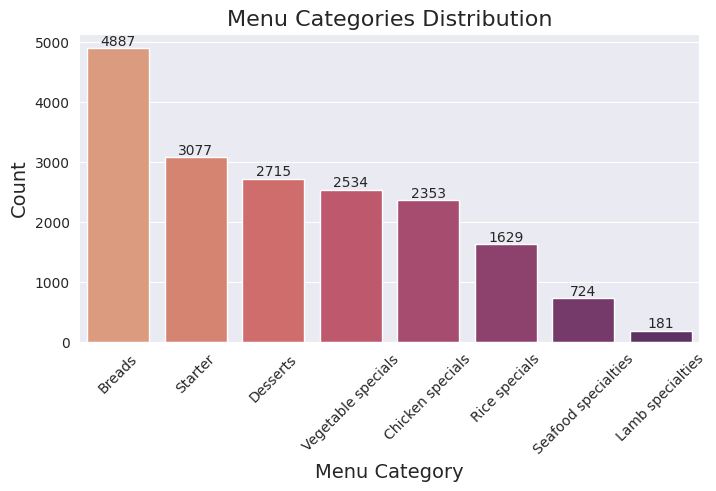

In [ ]:

category_counts = df['MenuCateogry'].value_counts()


plt.figure(figsize=(8, 4))
sns.set_style("darkgrid")
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette="flare")


for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.0f', label_type='edge')


plt.title('Menu Categories Distribution', fontsize=16)
plt.xlabel('Menu Category', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(rotation=45)


plt.show()



<ipython-input-22-9bfc3a65a28c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=price_counts.index, y=price_counts.values, palette="flare")


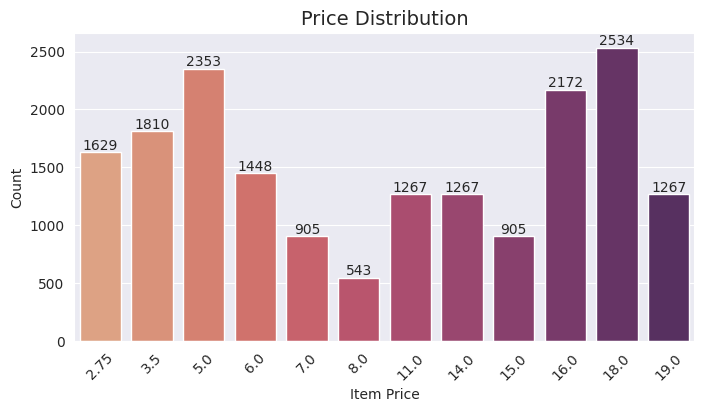

In [ ]:
unique_prices = sorted(df['ItemPrice'].unique())
unique_menu_Items = df['MenuItem'].unique()

price_counts = df['ItemPrice'].value_counts().sort_index()

sns.set_style("darkgrid")


plt.figure(figsize=(8, 4))
ax = sns.barplot(x=price_counts.index, y=price_counts.values, palette="flare")


for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.0f', label_type='edge')


plt.title('Price Distribution', fontsize=14)
plt.xlabel('Item Price')
plt.ylabel('Count')


plt.xticks(rotation=45)

plt.show()


## Consumption Analysis

### Items Quantity Ordered for Indiviuals vs. Small vs. Big Gatherings

<Figure size 1200x600 with 0 Axes>

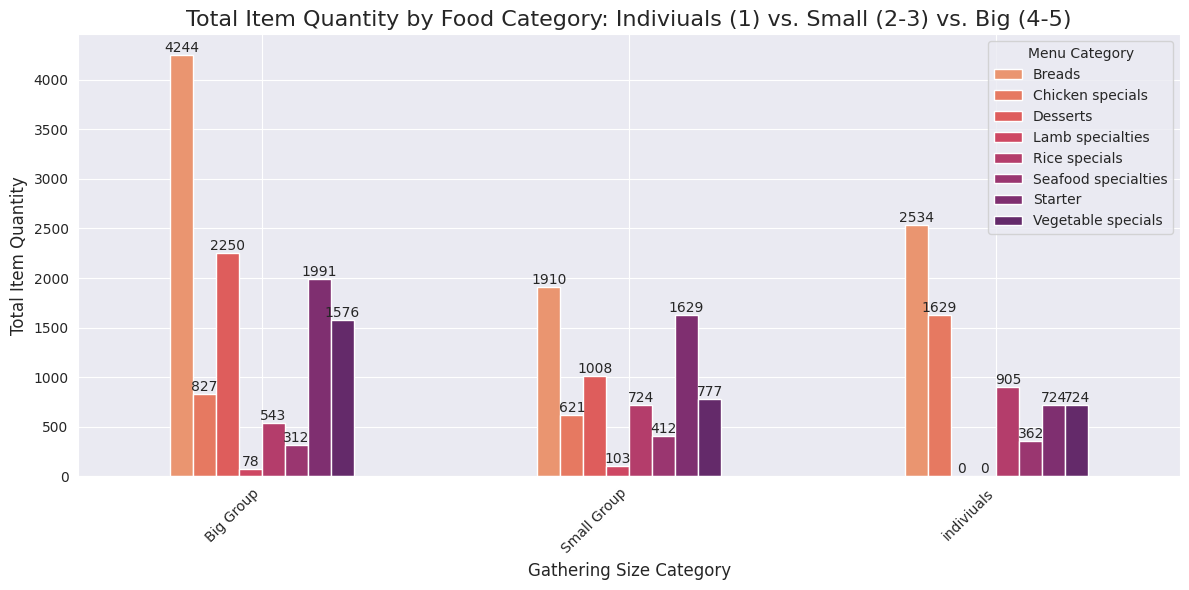

In [ ]:
unique_gathering_size = df['GatheringSize'].unique()
unique_itemquantity = df['ItemQty'].unique()

def gathering_size(size):
    if size == 0:
        return 'indiviuals'
    elif 2 <= size <= 3:
        return 'Small Group'
    elif 4 <= size <= 5:
        return 'Big Group'
    else:
        return 'Other'


df['GatheringSizeCategory'] = df['GatheringSize'].apply(gathering_size)


filtered_df = df[df['GatheringSizeCategory'] != 'Exclude']



grouped_data = filtered_df.groupby(['GatheringSizeCategory', 'MenuCateogry'])['ItemQty'].sum().unstack()


colors = sns.color_palette("flare", n_colors=len(grouped_data.columns))


plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', figsize=(12, 6), color=colors)


for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.0f', label_type='edge')


plt.title('Total Item Quantity by Food Category: Indiviuals (1) vs. Small (2-3) vs. Big (4-5)', fontsize=16)
plt.xlabel('Gathering Size Category', fontsize=12)
plt.ylabel('Total Item Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Menu Category', fontsize=10)
plt.tight_layout()


plt.show()


### Specific Menu Items Quantity Across Gathering Sizes

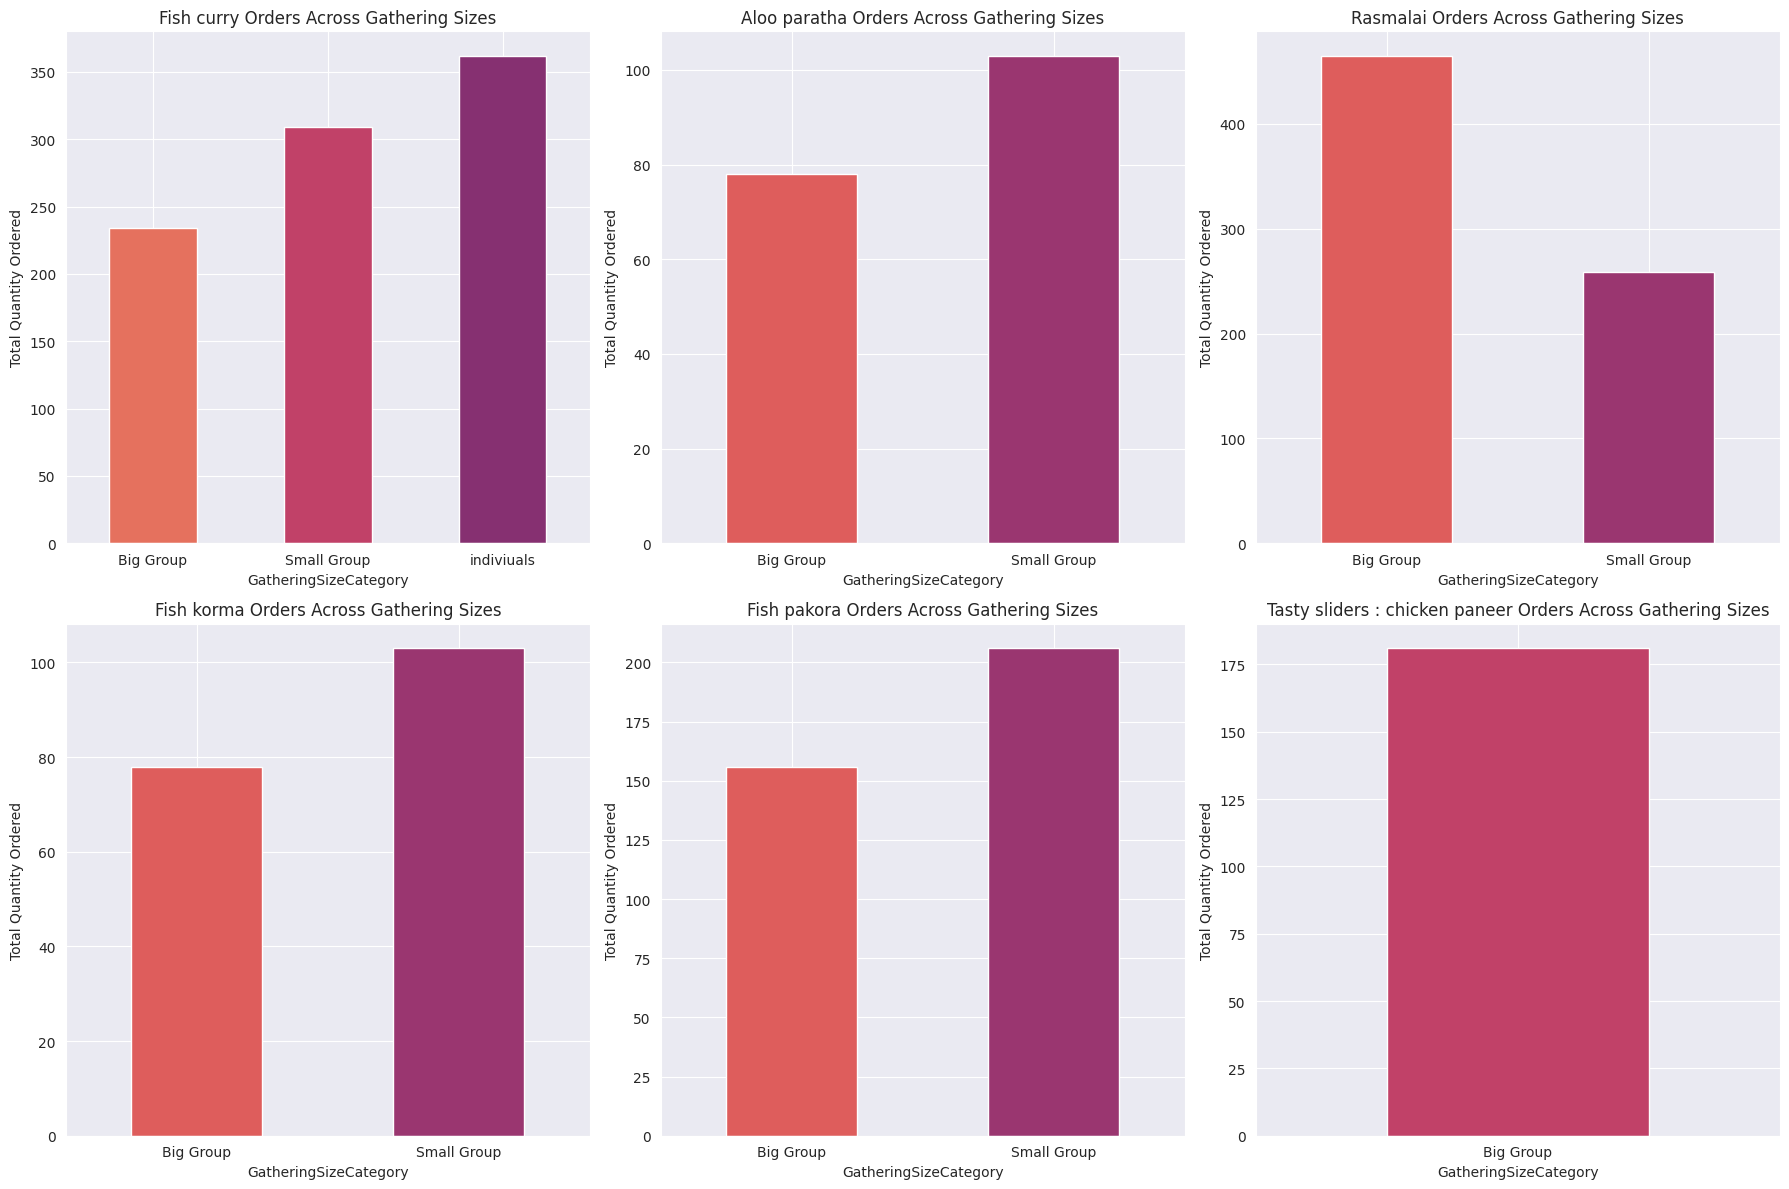

In [ ]:
# Get unique category-item pairs
unique_combinations = df[['MenuCateogry', 'MenuItem']].drop_duplicates().sample(n=6, random_state=42)

# Initialize the plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Iterate through the selected items and plot their data
for i, row in enumerate(unique_combinations.itertuples()):
    category, item = row.MenuCateogry, row.MenuItem

    # Filter dataset for the selected MenuCategory and MenuItem
    df_filtered = df[(df["MenuCateogry"] == category) & (df["MenuItem"] == item)]

    # Group by GatheringSizeCategory and sum the ItemQty
    comparison = df_filtered.groupby("GatheringSizeCategory")["ItemQty"].sum()

    # Define color palette
    colors = sns.color_palette("flare", n_colors=len(comparison))

    # Plot bar chart
    ax = axes[i]
    comparison.plot(kind="bar", color=colors, ax=ax)

    # Titles and labels
    ax.set_ylabel("Total Quantity Ordered")
    ax.set_title(f"{item} Orders Across Gathering Sizes")
    ax.set_xticklabels(comparison.index, rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()


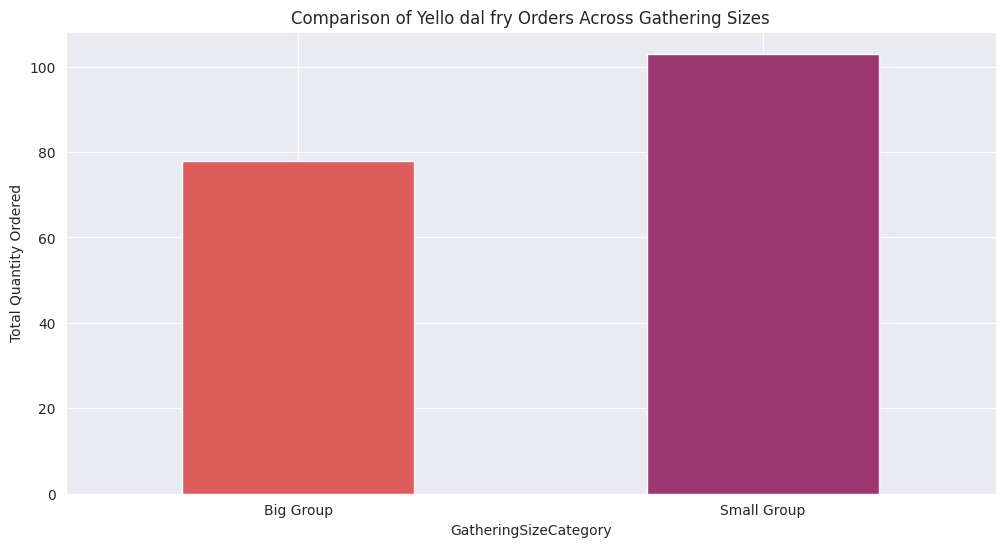

In [ ]:
# Change the MenuCategory & MenuItem in the first line to compare between quantity of items ordered in each gathering size
df_filtered = df[(df["MenuCateogry"] == "Vegetable specials") & (df["MenuItem"] == "Yellow dal fry")]

comparison = df_filtered.groupby("GatheringSizeCategory")["ItemQty"].sum()

colors = sns.color_palette("flare", n_colors=len(comparison))

plt.figure(figsize=(12, 6))
ax = comparison.plot(kind="bar", color=colors)

plt.ylabel("Total Quantity Ordered")
plt.title("Comparison of Yello dal fry Orders Across Gathering Sizes")
plt.xticks(rotation=0)

plt.show()


### Specific Menu Items Quantity per Person

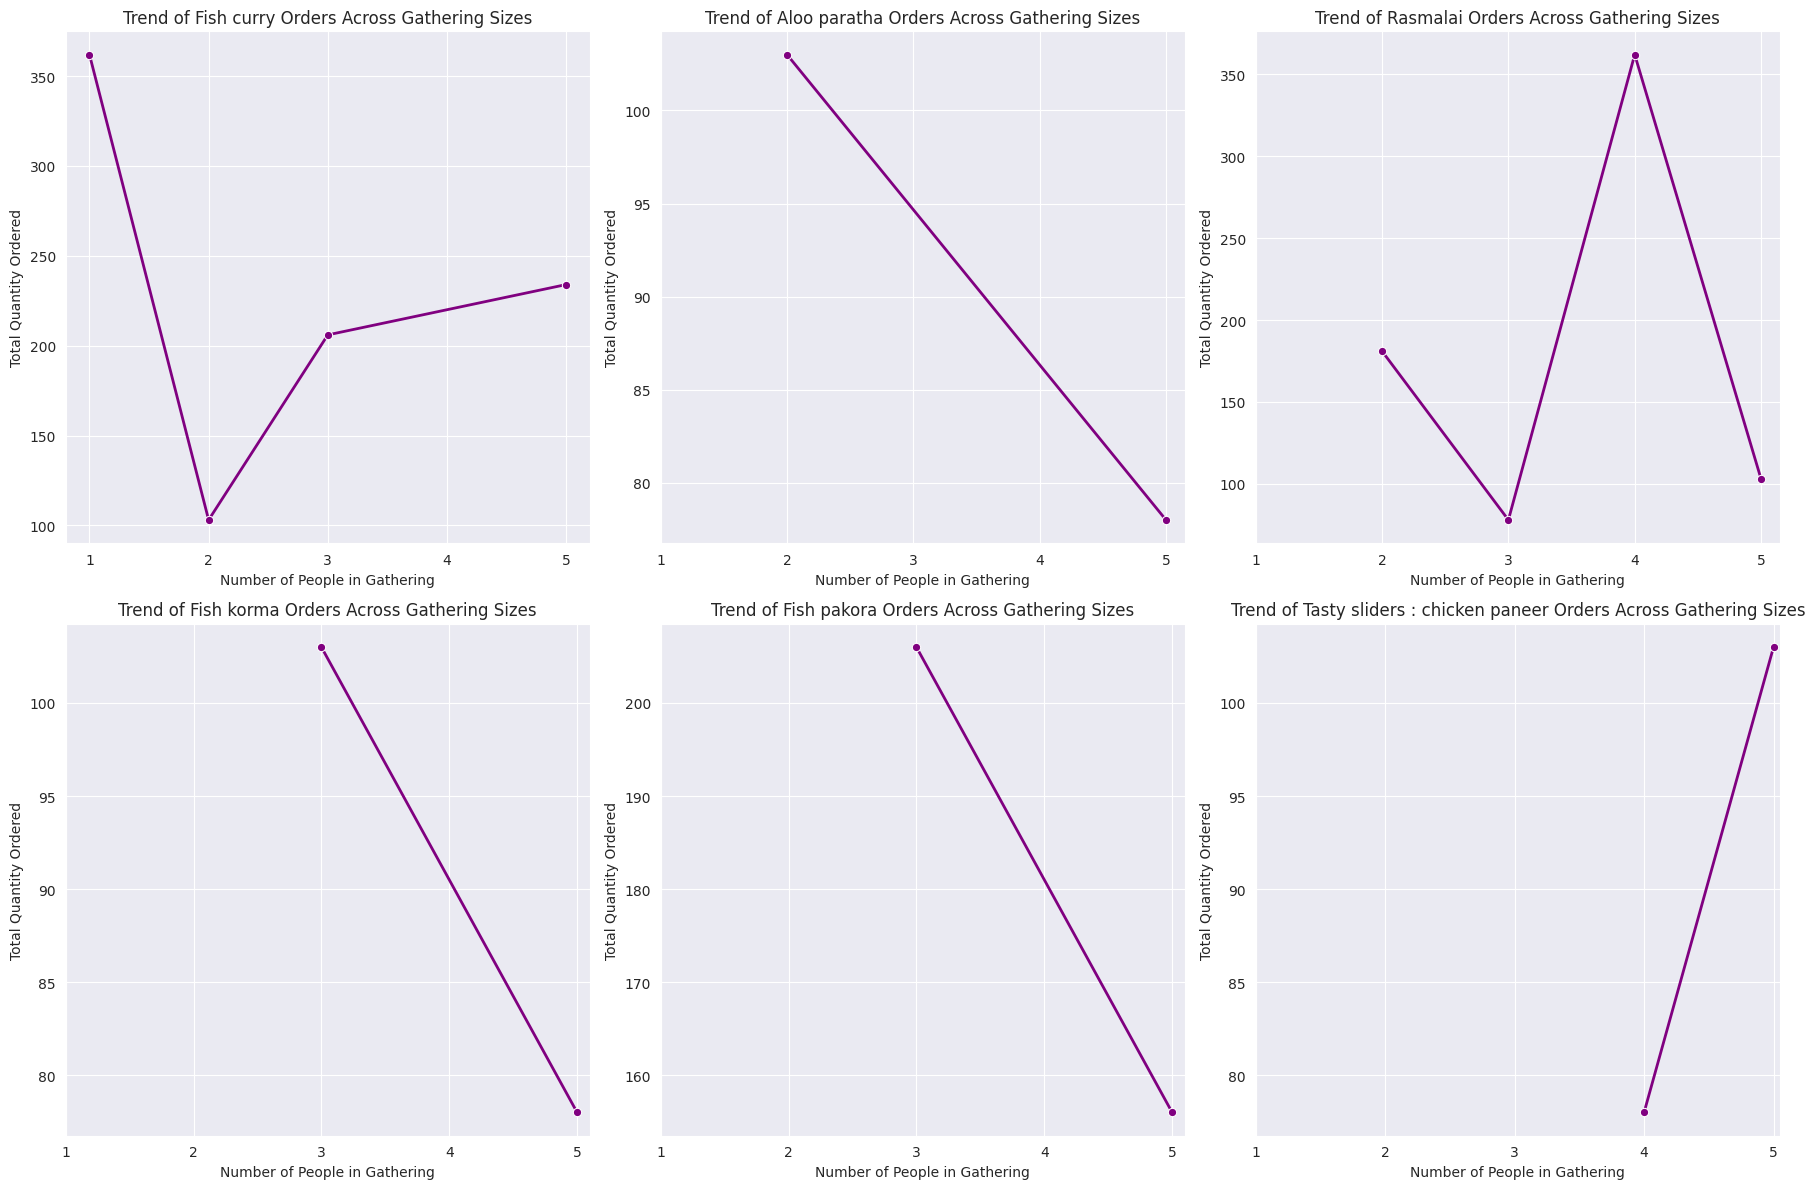

In [ ]:
# Get unique category-item pairs (same as in Code 2)
unique_combinations = df[['MenuCateogry', 'MenuItem']].drop_duplicates().sample(n=6, random_state=42)

# Define the required gathering sizes, treating 0 as 1
valid_sizes = {0: 1, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

# Initialize the plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Iterate through the selected items and plot their trend
for i, row in enumerate(unique_combinations.itertuples()):
    category, item = row.MenuCateogry, row.MenuItem

    # Filter dataset for the selected MenuCategory and MenuItem
    df_filtered = df[(df["MenuCateogry"] == category) & (df["MenuItem"] == item)].copy()

    # Replace gathering size 0 with 1 (1 is also treated as 1)
    df_filtered["GatheringSize"] = df_filtered["GatheringSize"].replace(valid_sizes)

    # Group by GatheringSize and sum the ItemQty
    trend_analysis = df_filtered.groupby("GatheringSize")["ItemQty"].sum().reset_index()

    # Keep only valid gathering sizes
    trend_analysis = trend_analysis[trend_analysis["GatheringSize"].isin(valid_sizes.values())]

    # Sort the data by GatheringSize for better trend visualization
    trend_analysis = trend_analysis.sort_values(by="GatheringSize")

    # Plot line chart
    ax = axes[i]
    sns.lineplot(data=trend_analysis, x="GatheringSize", y="ItemQty", marker="o", linewidth=2, color="purple", ax=ax)

    # Titles and labels
    ax.set_xlabel("Number of People in Gathering")
    ax.set_ylabel("Total Quantity Ordered")
    ax.set_title(f"Trend of {item} Orders Across Gathering Sizes")
    ax.set_xticks([1, 2, 3, 4, 5])  # Ensure continuous x-axis
    ax.set_xticklabels(["1", "2", "3", "4", "5"])
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


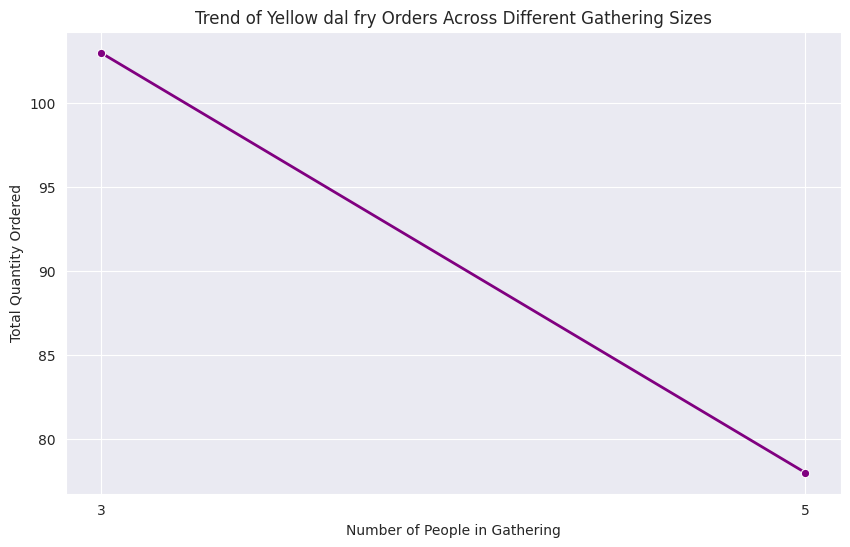

In [ ]:
# Define the specific category and item to analyze
selected_category = "Vegetable specials"
selected_item = "Yellow dal fry"

# Filter dataset for the selected MenuCategory and MenuItem
df_filtered = df[(df["MenuCateogry"] == selected_category) & (df["MenuItem"] == selected_item)]

# Group by GatheringSize and sum the ItemQty
trend_analysis = df_filtered.groupby("GatheringSize")["ItemQty"].sum().reset_index()

# Sort the data by GatheringSize for better trend visualization
trend_analysis = trend_analysis.sort_values(by="GatheringSize")

# Visualization: Line plot to show trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_analysis, x="GatheringSize", y="ItemQty", marker="o", linewidth=2, color="purple")

# Labels and Titles
plt.xlabel("Number of People in Gathering")
plt.ylabel("Total Quantity Ordered")
plt.title(f"Trend of {selected_item} Orders Across Different Gathering Sizes")
plt.xticks(trend_analysis["GatheringSize"])  # Ensure all group sizes appear
plt.grid(True)

# Show plot
plt.show()

You can download the notebook to do further analysis.